<img src="https://dsiag.ch/images/dsi_rgb.png" alt="dsi logo" width="100" style="position: absolute; right: 0px;"/>

# Regression Plots

Try to extrapolate into the future.

We want to answer the question ***_'Is it possible to replace the nuclear power plants by 2030 using renewable energy?'_***





## Loading data

We use `pd.read_csv` to read the csv files into a `DataFrame`. 

After reading we set the index to the corresponding column which makes it easier to join tables and join the (sub)-category names in order to have all information in one `epp` table 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date


plt.rcParams["figure.figsize"] = (20, 10)

epp = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/ElectricityProductionPlant.csv', parse_dates=['BeginningOfOperation']).set_index('xtf_id')
mainCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/MainCategoryCatalogue.csv').set_index('Catalogue_id')
subCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/SubCategoryCatalogue.csv').set_index('Catalogue_id')
plantCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/PlantCategoryCatalogue.csv').set_index('Catalogue_id')

lang='de'

epp = epp.merge(mainCat[lang].rename("MainCategoryName"),how='left', left_on='MainCategory', right_index=True)
epp = epp.merge(subCat[lang].rename("SubCategoryName"),how='left', left_on='SubCategory', right_index=True)
epp = epp.merge(plantCat[lang].rename("PlantCategoryName"),how='left', left_on='PlantCategory', right_index=True)

display(epp.head())

,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y,MainCategoryName,SubCategoryName,PlantCategoryName
xtf_id,,,,,,,,,,,,,,,
5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,maincat_1,subcat_1,plantcat_6,2589880.0,1097661.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5686,Binenweg 5,3904,Naters,VS,1969-09-01,349576.0,349576.0,maincat_1,subcat_1,plantcat_7,2644115.0,1131390.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5726,Robbia 504G,7741,San Carlo,GR,1910-11-03,29150.0,29150.0,maincat_1,subcat_1,plantcat_2,2801863.0,1136379.0,Wasserkraft,Wasserkraft,Ausleitkraftwerk
5727,Via Principale 16,7744,Campocologno,GR,1907-03-01,55000.0,55000.0,maincat_1,subcat_1,plantcat_7,2808646.0,1123676.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5730,Büdemli 65B,7240,Küblis,GR,1922-01-01,44200.0,44200.0,maincat_1,subcat_1,plantcat_7,2778481.0,1198505.0,Wasserkraft,Wasserkraft,Speicherkraftwerk


## Calculate current Total Power 

In [2]:
current_power = epp['TotalPower'].sum()

print()
print("Currently installed power:", current_power)


Currently installed power: 22249583.020000003


## Calculate Cumulative Total Power per Time

In order to plot the increasing total installed power we need to calculate the cumulative sum.

In [4]:
power_without_nuclear_plants = epp[(epp['MainCategory'] != 'maincat_3') & (epp['MainCategory'] != 'maincat_4')].groupby(['BeginningOfOperation'], as_index=False)['TotalPower' ].sum().sort_index().replace(np.nan, 0)
power_without_nuclear_plants['BeginningOfOperationFloat'] = pd.to_datetime(power_without_nuclear_plants['BeginningOfOperation']).apply(lambda date: date.toordinal())



<div class="alert alert-block alert-success">
<b>Exercise: Calculate the cumulative sum over the total power</b> 

Add an additional column 'Cumulative' to our data frame 'power_without_atomic_plants', which contains the cumulative sum of the total power. To calculate the cumulative sum you can use: https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html
    
</div>

In [6]:
power_without_nuclear_plants['Cumulative'] = power_without_nuclear_plants['TotalPower'].cumsum()
power_without_nuclear_plants



,BeginningOfOperation,TotalPower,BeginningOfOperationFloat,Cumulative
0,1863-01-01,200.00,680082,200.00
1,1886-01-01,740.00,688483,940.00
2,1888-01-01,360.00,689213,1300.00
3,1890-01-01,240.00,689944,1540.00
4,1891-01-01,5315.00,690309,6855.00
...,...,...,...,...
5859,2021-03-26,228.14,737875,18949937.77
5860,2021-03-28,29.70,737877,18949967.47
5861,2021-03-30,171.80,737879,18950139.27
5862,2021-04-08,7.03,737888,18950146.30


### Create a Regression Plot 


<div class="alert alert-block alert-success">
<b>Exercise: Create a regression plot</b> 

1. Create a regression plot with <i>BeginningOfOpreationFloat</i> as x and <i>Cumulative</i> as y. Do you agree with the trend outlined by the regression?
    
2. Extrapolate to the future. Set parameter truncate=True for your regression plot and increase the plotted size : `reg.set(xlim=(pd.to_datetime(np.datetime64('2000-01-01', 'ns')).toordinal(), pd.to_datetime(np.datetime64('2030-01-01', 'ns')).toordinal()))`
    
3. Change the parameter order of your `regplot`. How does the regression adjust?

4. Check if we reach our goal to fully replace the nuclear power plants. Add a horizontal line showing the `current_power` we calculated earlier. Do we reach our goal? Hint: Use `reg.axhline`
    
5. (Optional) Do your regression only with data from the last 10 years. 

    
Hint: To receive prettier X-tick-labels you can use: `reg.set_xticklabels([date.fromordinal(int(item)) for item in reg.get_xticks()])`
</div>


## Solution Ex 1-4

<ipython-input-16-917fd0128f53>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  reg.set_xticklabels([date.fromordinal(int(item)) for item in reg.get_xticks()])


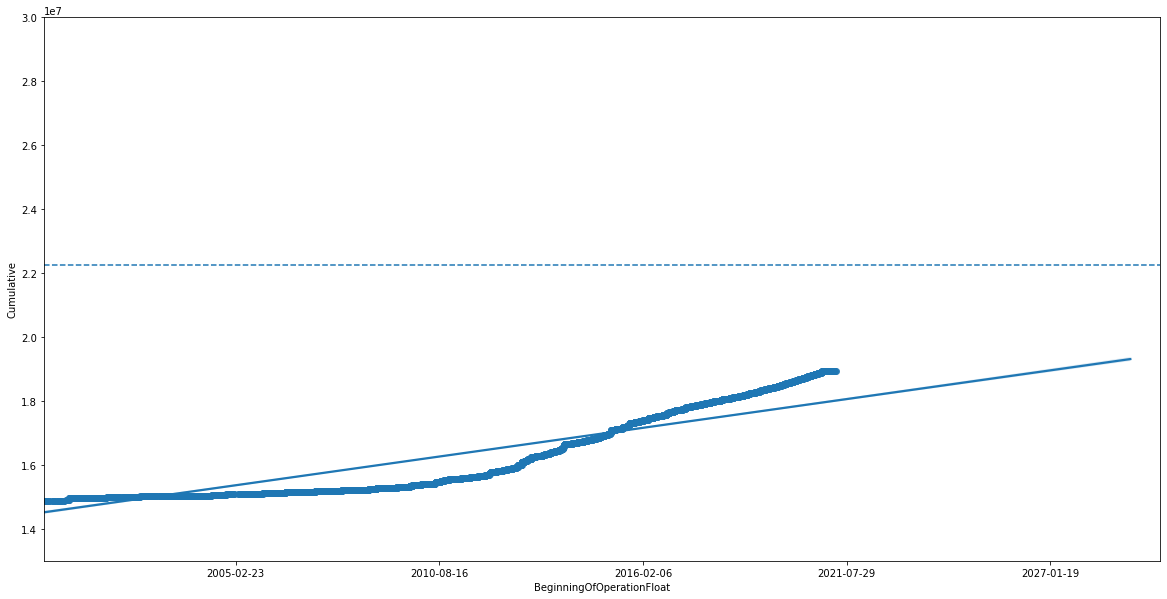

In [16]:
reg = sns.regplot(x='BeginningOfOperationFloat', y='Cumulative', data=power_without_nuclear_plants, order=1, truncate=False)
reg.set(xlim=(pd.to_datetime(np.datetime64('2000-01-01', 'ns')).toordinal(), pd.to_datetime(np.datetime64('2030-01-01', 'ns')).toordinal()))
reg.set(ylim=(1.3*1e7,3*1e7))
reg.set_xticklabels([date.fromordinal(int(item)) for item in reg.get_xticks()])
reg.axhline(current_power, ls='--')


## Solution EX 05: Data Last 10 years

<ipython-input-20-221198d7168e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  reg.set_xticklabels([date.fromordinal(int(item)) for item in reg.get_xticks()])


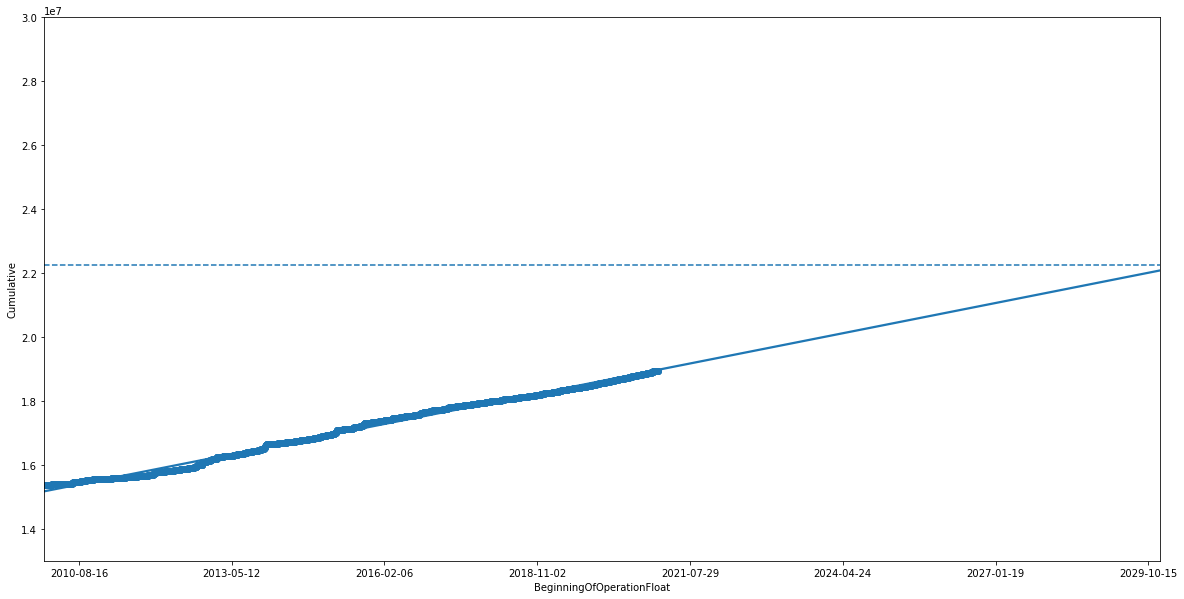

In [20]:
data_10years = power_without_nuclear_plants[
    (power_without_nuclear_plants['BeginningOfOperationFloat'] > pd.to_datetime(np.datetime64('2010-01-01', 'ns')).toordinal()) &
    (power_without_nuclear_plants['BeginningOfOperationFloat'] < pd.to_datetime(np.datetime64('2021-01-01', 'ns')).toordinal())]

plt.figure()
plt.xlim(pd.to_datetime(np.datetime64('2010-01-01', 'ns')).toordinal(), pd.to_datetime(np.datetime64('2030-01-01', 'ns')).toordinal())

reg = sns.regplot(x=data_10years['BeginningOfOperationFloat'], y=data_10years['Cumulative'], order=1, truncate=False)
reg.set(ylim=(1.3*1e7,3*1e7))
reg.set_xticklabels([date.fromordinal(int(item)) for item in reg.get_xticks()])
reg.axhline(current_power, ls='--')

